# Exercise 1: Belief propagation on the Ising Model

**Ex. 1.1:**

The correct recursive equation to calculate $\omega_{ i -1 } ^{(i)}$ from
$\omega^{(i-1)}_{ i-2 } $ is
$$
\omega^{(i)}_{ i -1 }
= h
+ \frac{1}{2 \beta} \log\left(
\frac{\cosh( \beta ) + \tanh( \beta w_{ i-2 } ^{(i-1)} ) \sinh( \beta )  }{\cosh( \beta ) - \tanh( \beta w_{ i-2 } ^{(i-1)} ) \sinh( \beta )  }
\right)
$$

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sum_product_propagation(w, beta, h):
    """Implement the equation from top of this notebook."""
    cosh_beta = np.cosh(beta)
    sinh_beta = np.sinh(beta)
    x = cosh_beta + np.tanh(beta * w) * sinh_beta
    y = cosh_beta - np.tanh(beta * w) * sinh_beta
    return h + np.log(x / y) / 2 / beta

**Exercise 1.2**

In [3]:
# set parameters
beta = 1 / 2
h = 1 / 3
w_2_1 = 1
w_2_2 = np.log(3)
N = 50

figure_dir = Path.cwd() / ".." / "report" / "figures"
plt.rcParams['figure.dpi'] = 159
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 18

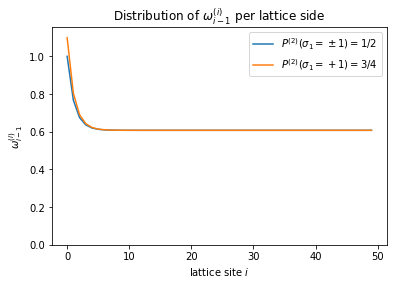

In [4]:
lattice = np.zeros(N)
lattice[0] = w_2_1
for idx in range(1, N):
    lattice[idx] = sum_product_propagation(lattice[idx - 1], beta, h)

lattice2 = np.zeros(N)
lattice2[0] = w_2_2
for idx in range(1, N):
    lattice2[idx] = sum_product_propagation(lattice2[idx - 1], beta, h)

plt.plot(lattice, label="$P^{(2)}(\\sigma_1 = \pm 1) = 1/2$")
plt.plot(lattice2, label="$P^{(2)}(\\sigma_1 = + 1) = 3/4$")
plt.title("Distribution of $\\omega_{i-1}^{(i)}$ per lattice side")
plt.xlabel("lattice site $i$")
plt.ylabel("$\\omega_{i-1}^{(i)}$")
plt.ylim(0, w_2_2 * 1.05)
plt.legend()
plt.savefig(figure_dir / "1_2_precisions.pdf")
plt.show()

**Exercise 1.3**

In [5]:
# set parameters
beta = 1 / 2
h = 1 / 3
w_2_1 = np.linspace(0, 1, num=10)
N = 50

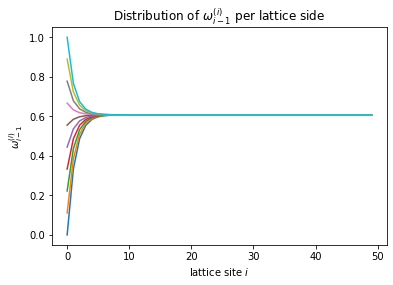

In [6]:
results = []
for w_start in w_2_1:
    lattice = np.zeros(N)
    lattice[0] = w_start
    for idx in range(1, N):
        lattice[idx] = sum_product_propagation(lattice[idx - 1], beta, h)
    results.append(lattice)

plt.plot(np.array(results).T)
plt.title("Distribution of $\\omega_{i-1}^{(i)}$ per lattice side")
plt.xlabel("lattice site $i$")
plt.ylabel("$\\omega_{i-1}^{(i)}$")
plt.ylim(max(-.05, np.min(w_2_1) - .05), min(1.05, np.max(w_2_1) + .05))
plt.savefig(figure_dir / "1_3_precisions.pdf")
plt.show()

**Exercise 1.4**

In [7]:
# set parameters
h = 1
w_2_1 = 0.7
tol = 1e-7
N = 50
runs = 100
beta = np.logspace(-10, 4, base=2.001, num=runs)

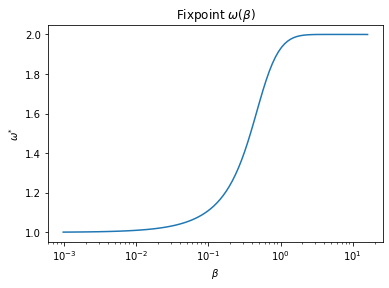

In [8]:
lattice = np.zeros(N)
omega_star = []
lattice[0] = w_2_1
for b in beta:
    for idx in range(1, N):
        lattice[idx] = sum_product_propagation(lattice[idx - 1], b, h)
    omega_star.append(lattice[-1])

plt.plot(beta, omega_star)
plt.title("Fixpoint $\\omega(\\beta)$")
plt.xscale("log")
plt.xlabel("$\\beta$")
plt.ylabel("$\\omega^{*}$")
plt.savefig(figure_dir / "1_4_fixpoint.pdf")
plt.show()

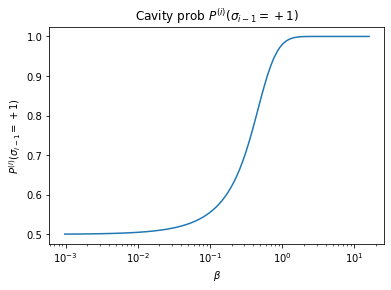

In [9]:
cavity_probs_plus = (1 + np.tanh(beta * omega_star)) / 2
cavity_probs_minus = (1 - np.tanh(beta * omega_star)) / 2

plt.plot(beta, cavity_probs_plus)
plt.title("Cavity prob $P^{(i)}(\\sigma_{i -1} = +1)$")
plt.xscale("log")
plt.xlabel("$\\beta$")
plt.ylabel("$P^{(i)}(\\sigma_{i -1} = +1)$")
plt.savefig(figure_dir / "1_4_cavity_prob.pdf")
plt.show()

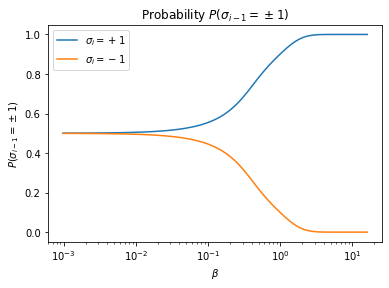

In [10]:
prob_plus = np.zeros_like(cavity_probs_plus)
prob_minus = np.zeros_like(cavity_probs_plus)
for idx in range(runs):
    prob_plus[idx] = np.exp(beta[idx] * h)
    prob_minus[idx] = np.exp(-beta[idx] * h)
    for neighbour in (-1, 1):
        s1 = np.exp(beta[idx]) * cavity_probs_plus[idx]
        s2 = np.exp(-beta[idx]) * cavity_probs_minus[idx]
        prob_plus[idx] *= s1 + s2

        s1 = np.exp(-beta[idx]) * cavity_probs_plus[idx]
        s2 = np.exp(beta[idx]) * cavity_probs_minus[idx]
        prob_plus[idx] *= s1 + s2

evidence = prob_plus + prob_minus
plt.plot(beta, prob_plus / evidence, label="$\\sigma_i = +1$")
plt.plot(beta, prob_minus / evidence, label="$\\sigma_i = -1$")
plt.title("Probability $P(\\sigma_{i -1} = \\pm 1)$")
plt.xscale("log")
plt.xlabel("$\\beta$")
plt.ylabel("$P(\\sigma_{i -1} = \\pm 1)$")
plt.legend()
plt.savefig(figure_dir / "1_4_prob.pdf")
plt.show()

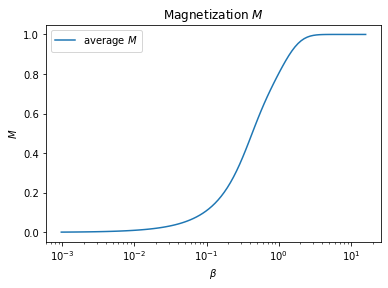

In [11]:
magnetization = (prob_plus - prob_minus) / evidence

plt.plot(beta, magnetization, label="average $M$")
plt.title("Magnetization $M$")
plt.xscale("log")
plt.xlabel("$\\beta$")
plt.ylabel("$M$")
plt.legend()
plt.savefig(figure_dir / "1_4_magnetization.pdf")
plt.show()